
This file is for **the blur the image** and **split** them into 4 different images used for srcnn training.

The integer pixel image need to be intro-coded by HEVC to achieve similar result with the coded frame in HEVC interpolation.


In [69]:
import os
import sys
from pathlib import Path

repo_dir = os.path.abspath(os.path.join('..'))
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

In [70]:
from PIL import ImageFilter
from PIL import Image
print('PIL',PIL.__version__)
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np

PIL 6.0.0


In [71]:
def array_to_img(x, mode='YCbCr'):
    if mode == 'gray':
        return Image.fromarray(x.astype('uint8')).convert('RGB')
    elif mode == 'RGB':
        return Image.fromarray(x.astype('uint8'))
    else:
        return Image.fromarray(x.astype('uint8'), mode=mode).convert('RGB')


Config

In [72]:
scale = 2
split_num = 2 # split into 2*2 subimages
save_dir = Path(repo_dir) / 'data' /'BSDS500_blur_split'
save_dir.mkdir(parents=True, exist_ok=True)

Multiple image batch processing

In [151]:
for n in range(400):
    fileName = 'img' + str(n+1) + '.jpg'
    image_dir = Path(repo_dir) / 'data' /'BSDS500' / fileName
    image = load_img(image_dir)
    imageBlur = image.filter(ImageFilter.GaussianBlur(radius=0.5))
    size = np.array(imageBlur.size)
    size -= size % scale
    imageCrop = imageBlur.crop([0, 0, *size])
    x = img_to_array(imageCrop)
    
    # Split format
    # 0, 1
    # 2, 3
    for i in range(split_num):
        for j in range(split_num): # row
            img = x[i::split_num, j::split_num, :]
            output_image = array_to_img(img,'RGB')
            output_image.save(str(save_dir / ('img' + str(n+1) + '_' + '%02d' % (i*split_num + j) + '.bmp')))


Single Image processing

In [121]:
scale = 2
split_num = 2 # split into 2*2 subimages
save_dir = Path(repo_dir) / 'data' /'BSDS500_blur_split'
save_dir.mkdir(parents=True, exist_ok=True)

fileName = 'img' + str(1) + '.jpg'
image_dir = Path(repo_dir) / 'data' /'BSDS500' / fileName
image = load_img(image_dir)
imageBlur = image.filter(ImageFilter.GaussianBlur(radius=0.5))
size = np.array(imageBlur.size)
size -= size % scale
imageCrop = imageBlur.crop([0, 0, *size])
x = img_to_array(imageCrop)

# Split format
# 0, 1
# 2, 3
for i in range(split_num):
    for j in range(split_num): # row
        img = x[i::split_num, j::split_num, :]
        output_image = array_to_img(img,'RGB')
        output_image.save(str(save_dir / ('img' + '1' + '_' + '%02d' % (i*split_num + j) + '.bmp')))

In [61]:
x.shape

(480, 320, 3)

After get the split image, using a bash script to conver the 00 picture into yuv format to do HEVC I frame encoding.

## Trying to display an yuv grey image

In [148]:
save_dir = Path(repo_dir) / 'data' /'BSDS500_blur_split'
img_dir = save_dir / ('img1_00.yuv')
# save_dir = Path(repo_dir) / 'experiments' / 'srcnn-9-1-5-sc4' / 'test' / 'mytest'
# file_name = 'poc01_00.yuv'
# image_dir = save_dir / file_name

# Guess a width and height and derive number of pixels in image
# w,h = 1280,720
w,h = 160,240
px = w*h

# Read entire file into YUV
with open(img_dir,'rb') as stream:
    YUV = np.fromfile(stream,dtype=np.uint8)
# YUV = np.fromfile(str(image_dir),dtype='uint8')

# Take first h x w samples and reshape as Y channel
Y = YUV[0:px].reshape((h,w))


In [149]:
YUV.shape

(57600,)

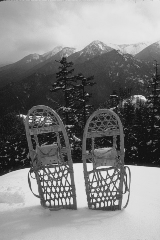

In [150]:
array_to_img(Y, 'gray')